In [108]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
df = pd.read_csv('gridwatch.csv')
df.tail(365)

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,biomass,solar
796088,858783,2019-08-02 13:50:35,28765,49.991001,0,5395,16634,875,292,610,2351,5560.0
796089,858784,2019-08-02 13:55:34,28803,49.952999,0,5375,16687,851,292,628,2361,5580.0
796090,858785,2019-08-02 14:00:35,28803,50.020000,0,5343,16717,851,292,630,2362,5600.0
796091,858786,2019-08-02 14:05:35,28749,50.009998,0,5320,16706,837,292,627,2361,5540.0
796092,858787,2019-08-02 14:10:36,28712,50.034000,0,5312,16709,831,193,614,2360,5530.0
...,...,...,...,...,...,...,...,...,...,...,...,...
796448,859143,2019-08-03 19:50:34,27306,50.039001,0,5466,14895,687,0,408,1718,119.0
796449,859144,2019-08-03 19:55:37,27379,49.992001,0,5435,14857,685,148,407,1716,122.0
796450,859145,2019-08-03 20:00:39,27425,49.977001,0,5404,14792,682,294,405,1715,127.0
796451,859146,2019-08-03 20:05:34,27407,49.922001,0,5380,14810,689,295,389,1714,11.5


In [110]:
print(df.columns)

Index(['id', ' timestamp', ' demand', ' frequency', ' coal', ' nuclear',
       ' ccgt', ' wind', ' pumped', ' hydro', ' biomass', ' solar'],
      dtype='object')


In [111]:
df = df.drop('id', axis=1)

In [113]:
# convert the 'timestamp' column to datetime format
df[' timestamp'] = pd.to_datetime(df[' timestamp'])

In [114]:
# set the 'timestamp' column as the index of the DataFrame
df = df.set_index(' timestamp')
df

,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,biomass,solar
timestamp,,,,,,,,,,
2012-01-01 00:00:01,30590,50.126999,8693,7121,8568,2740,0,728,0,0.0
2012-01-01 00:05:06,30490,50.039001,8650,7120,8441,2812,0,732,0,0.0
2012-01-01 00:10:01,30802,50.000000,8880,7125,8427,2896,0,744,0,0.0
2012-01-01 00:15:01,31180,50.028999,9111,7122,8494,2964,0,748,0,0.0
2012-01-01 00:20:01,31241,50.002998,9195,7114,8449,2992,0,750,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2019-08-03 19:50:34,27306,50.039001,0,5466,14895,687,0,408,1718,119.0
2019-08-03 19:55:37,27379,49.992001,0,5435,14857,685,148,407,1716,122.0
2019-08-03 20:00:39,27425,49.977001,0,5404,14792,682,294,405,1715,127.0


In [115]:
# resample the data to monthly frequency and calculate the mean
df_monthly = df.resample('M').mean()

In [116]:
df_monthly

,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,biomass,solar
timestamp,,,,,,,,,,
2012-01-31,40442.377875,49.994996,17445.275889,7669.972624,10612.302143,1723.539773,335.625042,713.933692,0.000000,0.000000
2012-02-29,43421.363037,49.999759,20238.814229,8341.558390,11163.627381,1632.414301,386.466403,558.284345,373.212481,0.000000
2012-03-31,37854.870877,50.001498,18417.794929,6315.853152,9552.953107,1149.333857,360.214158,423.823087,43.407225,0.000000
2012-04-30,36107.961275,50.001586,16015.283594,8056.049739,8843.337159,1084.815768,287.648000,211.824348,35.257855,0.000000
2012-05-31,34672.710361,49.950700,13523.164275,7929.516596,10121.865889,946.595425,303.540592,211.845817,43.381251,0.000000
...,...,...,...,...,...,...,...,...,...,...
2019-04-30,29539.929745,50.002998,393.973264,6312.246296,13355.650000,4778.339468,159.675694,277.303588,1676.893287,1776.315292
2019-05-31,27687.786738,49.969362,27.968974,6103.054884,12918.888217,3043.770161,117.248096,177.667339,2077.935708,1992.315843
2019-06-30,26640.745255,50.003069,80.170255,4443.231481,12605.521181,4200.326042,174.807755,267.128819,1969.634028,1782.357346


In [117]:
def line_plot(month, coal, nuclear, wind, solar):
    """
    This function creates a line plot 
    """
    fig, ax = plt.subplots(figsize=(18, 12))

    ax.plot(month, coal, label='Coal')
    ax.plot(month, nuclear, label='Nuclear')
    ax.plot(month, wind, label='Wind')
    ax.plot(month, solar, label='Solar')
    ax.grid(color='grey', linestyle='-', linewidth=0.001, alpha=0.3)
    plt.xlabel('Month')
    plt.ylabel('Energy')
    plt.title('Major Energy sources for UK from 2012 to 2019', fontsize=20, fontweight="bold")
    ax.legend()


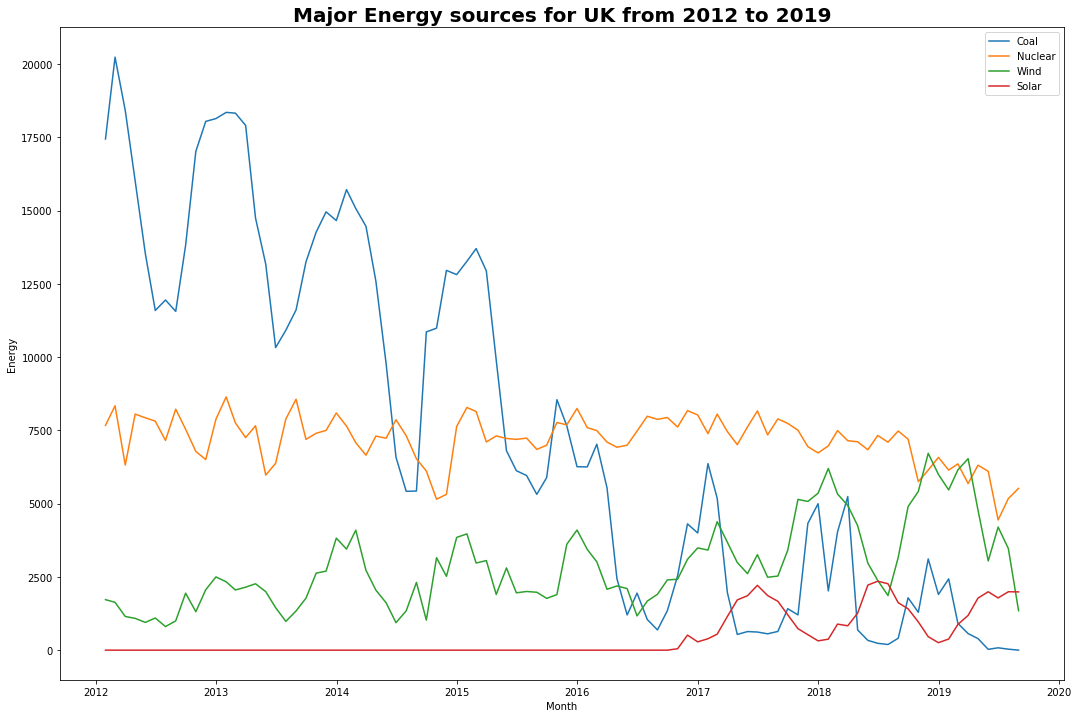

In [118]:
month = df_monthly.index
coal = df_monthly[' coal']
nuclear = df_monthly[' nuclear']
wind = df_monthly[' wind']
solar = df_monthly[' solar']
line_plot(month, coal, nuclear, wind, solar)

In [119]:
def area_plot(month, demand):
    """
    This function creates area plot 
    """
    fig, ax = plt.subplots(figsize=(20, 15))

    ax.plot(month, demand, label='Demand')
    ax.fill_between(month, demand,color='blue', alpha=0.2)
    ax.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.5)
    plt.xlabel('Month')
    plt.ylabel('Demand')
    plt.title('Energy demand for UK from 2012 to 2019', fontsize=20, fontweight="bold")
    ax.legend()

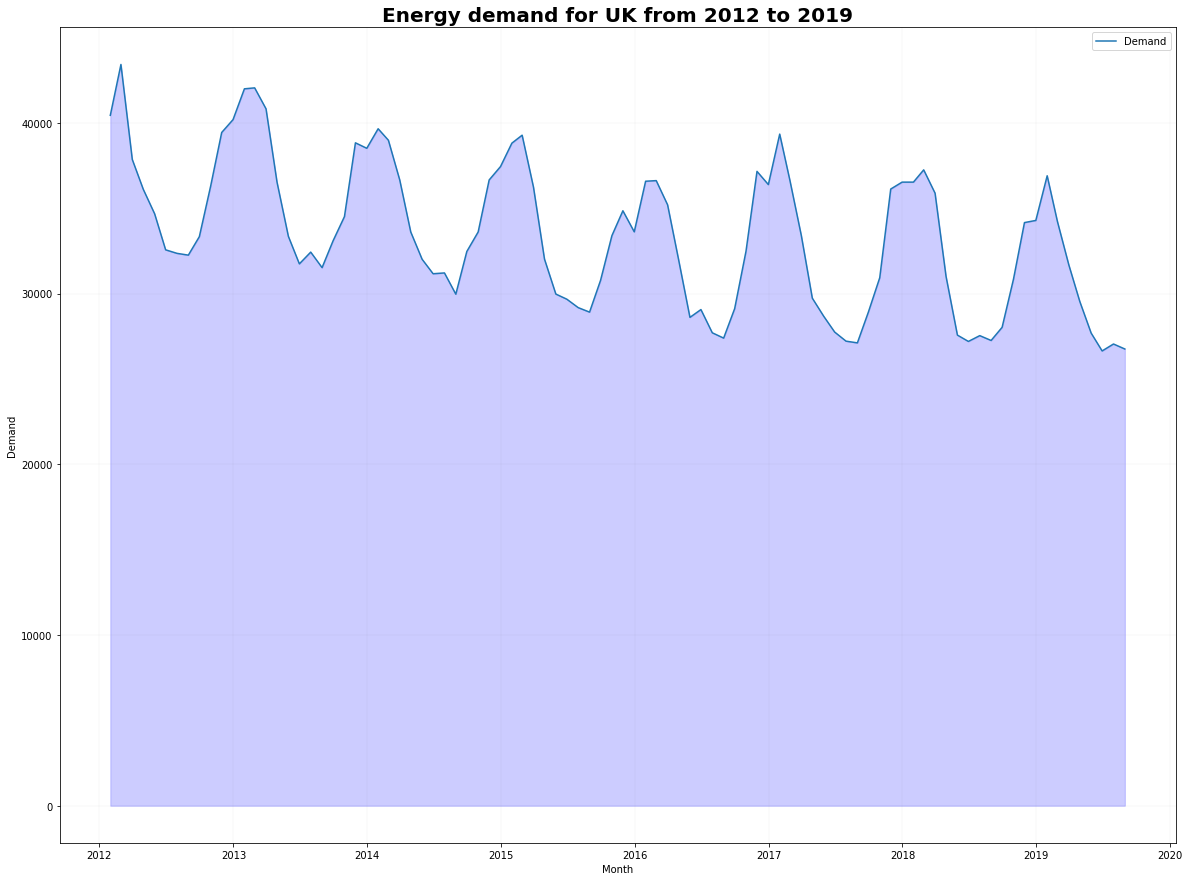

In [120]:
month = df_monthly.index
demand = df_monthly[' demand']
area_plot(month, demand)

In [128]:
df_monthly

,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,biomass,solar
timestamp,,,,,,,,,,
2012-01-31,40442.377875,49.994996,17445.275889,7669.972624,10612.302143,1723.539773,335.625042,713.933692,0.000000,0.000000
2012-02-29,43421.363037,49.999759,20238.814229,8341.558390,11163.627381,1632.414301,386.466403,558.284345,373.212481,0.000000
2012-03-31,37854.870877,50.001498,18417.794929,6315.853152,9552.953107,1149.333857,360.214158,423.823087,43.407225,0.000000
2012-04-30,36107.961275,50.001586,16015.283594,8056.049739,8843.337159,1084.815768,287.648000,211.824348,35.257855,0.000000
2012-05-31,34672.710361,49.950700,13523.164275,7929.516596,10121.865889,946.595425,303.540592,211.845817,43.381251,0.000000
...,...,...,...,...,...,...,...,...,...,...
2019-04-30,29539.929745,50.002998,393.973264,6312.246296,13355.650000,4778.339468,159.675694,277.303588,1676.893287,1776.315292
2019-05-31,27687.786738,49.969362,27.968974,6103.054884,12918.888217,3043.770161,117.248096,177.667339,2077.935708,1992.315843
2019-06-30,26640.745255,50.003069,80.170255,4443.231481,12605.521181,4200.326042,174.807755,267.128819,1969.634028,1782.357346


In [184]:
def pie_plot(start_year, end_year):
    """
    For plotting pie chart enter the start year and end year between 2012 to 2019
    As the data lies over this range.
    """
    for year in range(start_year, end_year +1):
        # Filter data for year
        start_year = f'{year}-01-31'
        end_year = f'{year}-12-31'
        included_columns = [' coal', ' nuclear',	' ccgt',	' wind',	' pumped',	' hydro',	' biomass',	' solar']
        data = df[included_columns]
        year_data = data[start_year:end_year]
         # Compute energy source totals for year
        year_totals = year_data.sum()

        # Create pie chart for year
        plt.figure(figsize=(10, 8)) 
        plt.pie(year_totals.values, labels=year_totals.index, autopct='%1.1f%%')
        plt.title(f'Energy Sources distribution for {year}', fontsize=20, fontweight="bold")
        plt.legend()

    # Show all plots
    plt.show()


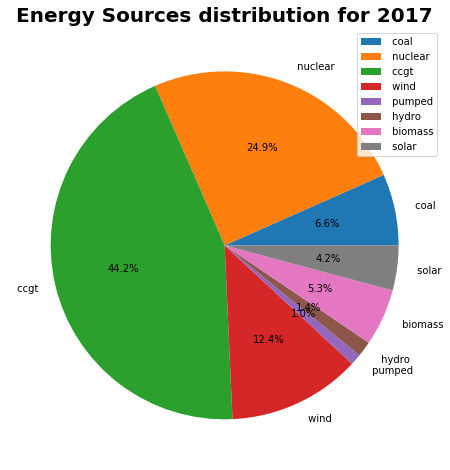

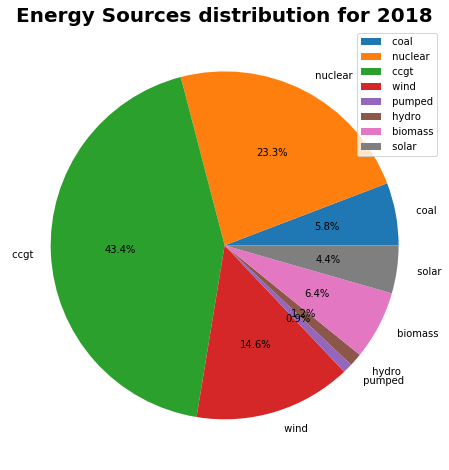

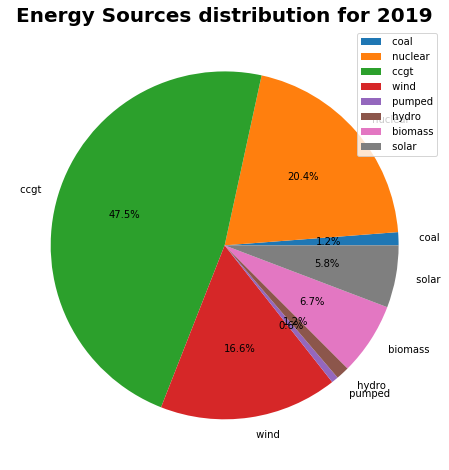

In [185]:
pie_plot(2017, 2019)

Text(0.5, 1.0, 'Energy Sources')

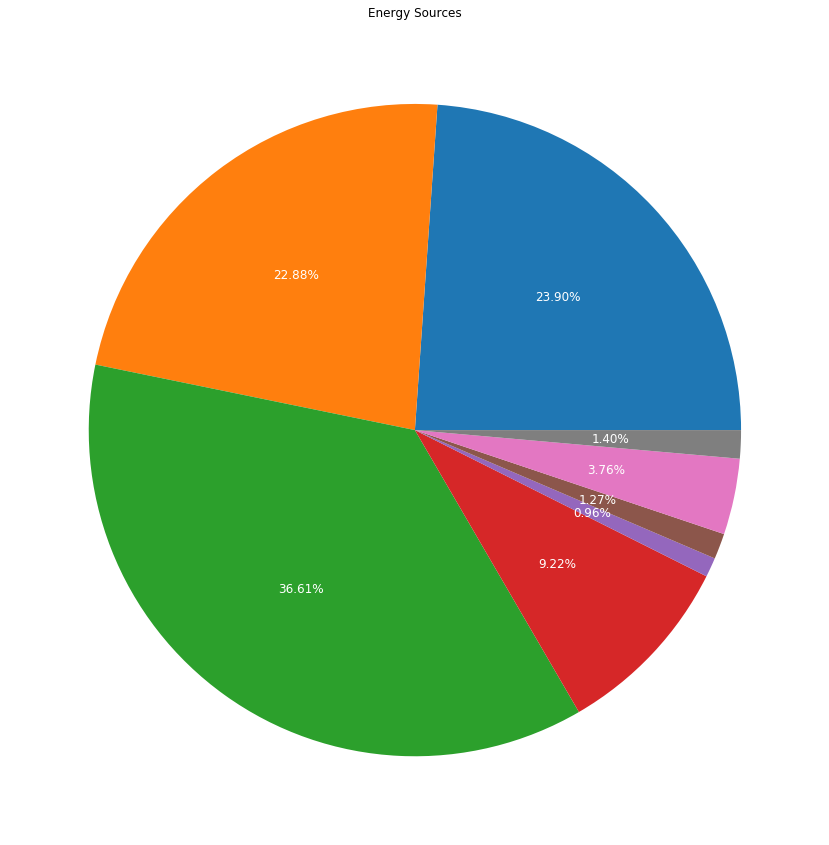

In [140]:

included_columns = [' coal', ' nuclear',	' ccgt',	' wind',	' pumped',	' hydro',	' biomass',	' solar']
data = df[included_columns].sum().to_dict()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(data.values(), labels=data.keys(), autopct='%1.2f%%',  textprops={'color': 'white', 'fontsize': 12})

# Set the plot title
plt.title('Energy Sources')


In [ ]:
idx = 

AttributeError: 'str' object has no attribute 'strftime'

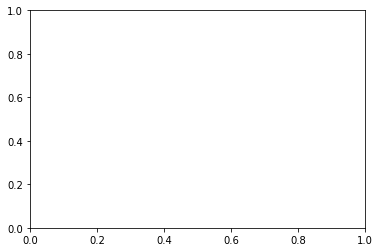

In [125]:
# Create a figure with a subplot
fig, ax = plt.subplots()

# Create a pie chart for each year
for i, (idx, value) in enumerate(yearly_data.iteritems()):
    ax.pie([value], labels=[idx.strftime('%Y')], startangle=90+i*30, counterclock=False, autopct='%1.1f%%')

# Set the plot title
ax.set_title('Monthly Data Distribution')

# Show the plot
plt.show()